In [1]:
from sympy import *
from syscirc.funcs import *
from syscirc.convolution import convolution_discrete_s

In [2]:
n, k = symbols('n k', integer=True)
u = lambda n: Piecewise((1, n >= 0), (0, True))

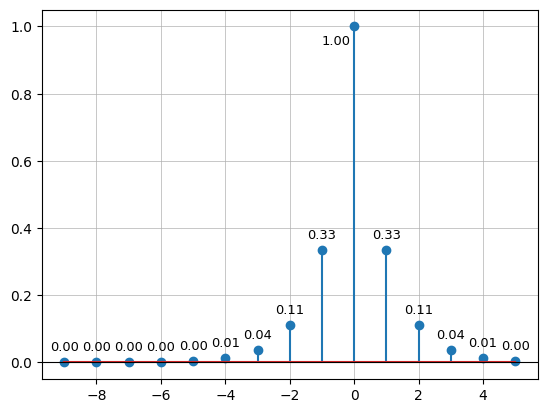

0.333333333333333**n*Piecewise((1, n >= 0), (0, True)) + 3**n*Piecewise((1, n <= -1), (0, True))

In [3]:
x = 3**n*u(-n-1)+(1/3)**n*u(n)
plotdiscr(x, [-9,5], [n])
x

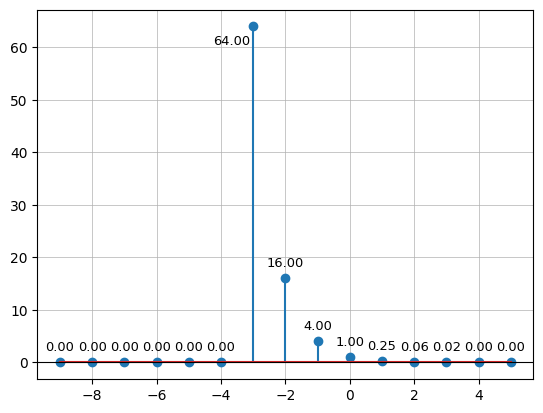

0.25**n*Piecewise((1, n >= -3), (0, True))

In [4]:
h = (1/4)**n*u(n+3)
plotdiscr(h, [-9,5], [n])
h

Solution proposed by the writer

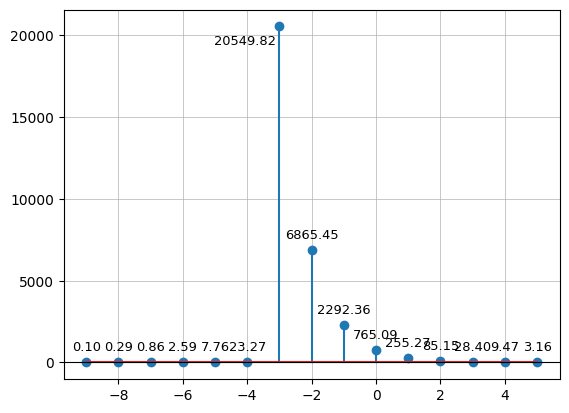

Piecewise((1885.09090909091*3**n, n < -4), (23.2727272727273, Eq(n, -4)), (-2.90909090909091*0.25**n + 768*0.333333333333333**n, n >= -3))

In [5]:
y_s = Piecewise(
    ((12**4/11)*3**n, n < -4),
    ((1/11)*4**4, Eq(n, -4)),
    ((1/11)*(1/4)**n - 3*(1/4)**n + 3*(256)*(1/3)**n, n >= -3)
)
plotdiscr(y_s, [-9,5], [n])
y_s

# Computed convolution

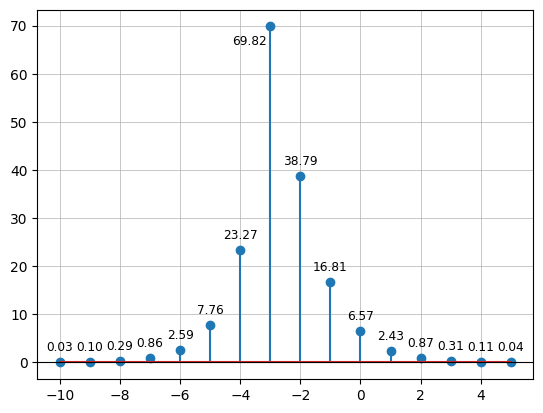

In [6]:
y = convolution_discrete_s(h, x, n , -500, 500)
plotdiscr(y, [-10,5], [n])

Manually computed convolution

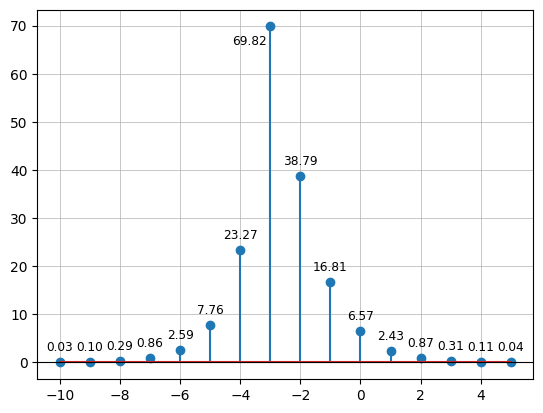

Piecewise((12**(n + 4)/11, n <= -4), (3*1.33333333333333**(n + 4) - 2.90909090909091, n >= -3))/4**n

In [7]:
# y_ = sum(x.subs(n, k)*h.subs(n, n-k) for k in range(-200, 200)) #OK
# y_ = sum(( Piecewise((3**k, k<=-1),((1/3)**k, True)) )*h.subs(n, n-k) for k in range(-200, 200)) #OK
# y_ = sum(Piecewise((3**k, k<=-1),((1/3)**k, True))*Piecewise(((1/4)**(n-k), n-k+3>=0), (0, True)) for k in range(-200, 200)) #OK

# y_ = (1/4)**n * (
#    Sum((4/3)**k, (k, 0, Max(-1,n+3)))
#     + Sum((1/12)**k, (k, Max(1, -n-3), 500))
# )
#OK

# y_ = (1/4)**n * (
#    Piecewise(
#        ( (1-(4/3)**(n+4))/(1-4/3) , n+3>=0),
#        (0, True)
#    )
#    + Sum((1/12)**k, (k, 0, 500))
#    - Sum((1/12)**k, (k, 0, Max(1, -n-3)-1))
# )
#OK

# y_ = Piecewise(
#    ( -3*(1/4**n - 4**(n+4)/(4**n*3**(n+4))), n >= -3),
#    (0, True)
# ) + (1/4)**n/(1-1/12) - (1/4)**n * (1-(1/12)**Max(1,-n-3))/(1-1/12)
#OK

# y_ = Piecewise(
#     ( 3*((4/3)**4*1/3**n - 1/4**n), n >= -3),
#     (0, True)
# ) + (12/11)*(1/4)**n - (12/11)*(1/4)**n*(1-(1/12)**Max(1,-n-3))
#OK

# y_ = Piecewise(
#     (3*(4**4/3**4*1/3**n-1/4**n), n>=-3),
#     (0, True)
# ) + (12/11)*(1/4)**n * (1/12)**Max(1,-n-3)
#OK

# y_ = Piecewise(
#     (0, n<-3),
#     (3*(4**4/3**4*1/3**n-1/4**n), n>=-3),
# ) + (12/11)*(1/4)**n * Piecewise(
#     ((1/12)**(-n-3), n<-4),
#     (1/12, n>=-4)
# )
#OK

# y_ = 1/4**n * (
#     Piecewise(
#         (0, n<-3),
#         (3*((4/3)**(n+4)-1), n>=-3),
#     ) + Piecewise(
#         (12**(4+n)/11, n<-4),
#         (1/11, n>=-4)
#     )
# )
#OK

y_ = 1/4**n * Piecewise(
    (12**(n+4)/11, n<=-4),
    (1/11 + 3*((4/3)**(n+4)-1), n>=-3)
)
#OK

plotdiscr(y_, [-10,5], [n])
# plotdiscr(y__, [-10,5], [n])
y_